# Naive Bayes and KNN without feature selection

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler

In [2]:
#loading dataset
wine=load_wine()
data=pd.DataFrame(wine.data, columns=wine.feature_names)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
data.shape

(178, 13)

In [4]:
#Checking null values
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
#checking for duplicated rows
data.duplicated().sum()

0

In [6]:
# Apply normalization on the 'proline' column
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [7]:
#Adding target column
data['wine'] = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [8]:
#Applying train test split
x=data.iloc[:,:-1]
Y=data['wine']
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=0,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


# Naive Bayes Classifier

In [9]:
#Importing and fitting
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
classifier = gnb.fit(x_train,y_train)

In [10]:
#Predicting values
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2])

In [11]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score_nb = accuracy_score(y_test,y_pred)
accuracy_score_nb

0.9444444444444444

In [12]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



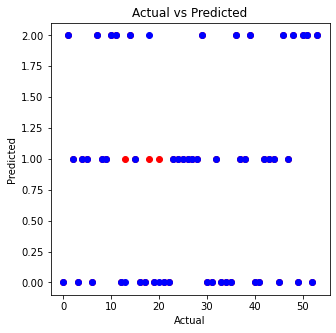

In [13]:
#Actual Vs Predicted
import matplotlib.pyplot as plt
id = [i for i in range(len(y_test))]
plt.figure(figsize=(5,5))
plt.scatter(id, y_test,color='red',label='actual values')
plt.scatter(id, y_pred,color='blue',label='predicted values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# KNN Algorithm

In [14]:
#Importing required libraries
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Create and train the KNN model
k = 19  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [16]:
# Make predictions
y_pred = knn.predict(x_test)

In [17]:
# Calculate accuracy
accuracy_score_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_score_knn:.2f}')

Accuracy: 0.98


In [18]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



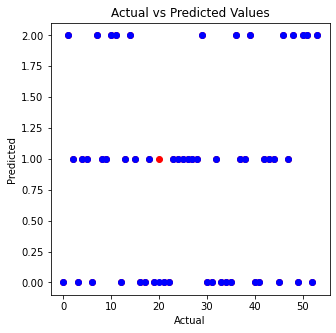

In [19]:
# Plot actual vs predicted
id = [i for i in range(len(y_test))]
plt.figure(figsize=(5,5))
plt.scatter(id, y_test, color='red', label='Actual')
plt.scatter(id, y_pred, color='blue', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

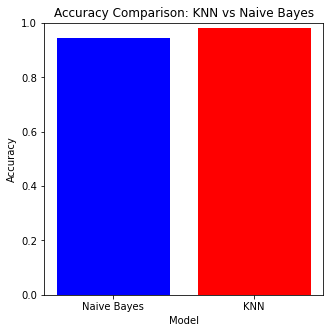

In [20]:
# Plot accuracy comparison
models = ['Naive Bayes', 'KNN']
accuracies = [accuracy_score_nb, accuracy_score_knn]

plt.figure(figsize=(5, 5))
plt.bar(models, accuracies, color=['blue', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: KNN vs Naive Bayes')
plt.ylim(0, 1)
plt.show()